In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cap-4611-2021-fall-assignment-02/sample_submission.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/eval.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/train.csv


# Uploading the data

In [2]:
train_data = pd.read_csv('../input/cap-4611-2021-fall-assignment-02/train.csv')
train_data.describe()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.00000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1184.000000,0.472203,0.048557,0.009852,0.219564,0.132301,0.019001,0.056298,0.034483,0.235749,...,0.014075,0.028149,0.055595,0.065447,0.116819,0.04152,0.111189,0.016890,0.016186,0.061928
std,410.351678,0.499402,0.215016,0.098803,0.414097,0.338937,0.136575,0.230578,0.182530,0.424616,...,0.117840,0.165457,0.229218,0.247400,0.321318,0.19956,0.314477,0.128903,0.126234,0.241110
min,474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1539.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [3]:
test_data = pd.read_csv('../input/cap-4611-2021-fall-assignment-02/eval.csv')
test_data.describe()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,236.500000,0.485232,0.054852,0.010549,0.253165,0.107595,0.021097,0.048523,0.035865,0.175105,...,0.010549,0.052743,0.063291,0.071730,0.122363,0.018987,0.137131,0.012658,0.014768,0.069620
std,136.976275,0.500310,0.227932,0.102271,0.435284,0.310196,0.143860,0.215096,0.186150,0.380459,...,0.102271,0.223755,0.243743,0.258313,0.328051,0.136624,0.344349,0.111913,0.120750,0.254775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,236.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,354.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,473.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1421 non-null   int64 
 1   title                     1421 non-null   object
 2   console                   1421 non-null   int64 
 3   alcohol_reference         1421 non-null   int64 
 4   animated_blood            1421 non-null   int64 
 5   blood                     1421 non-null   int64 
 6   blood_and_gore            1421 non-null   int64 
 7   cartoon_violence          1421 non-null   int64 
 8   crude_humor               1421 non-null   int64 
 9   drug_reference            1421 non-null   int64 
 10  fantasy_violence          1421 non-null   int64 
 11  intense_violence          1421 non-null   int64 
 12  language                  1421 non-null   int64 
 13  lyrics                    1421 non-null   int64 
 14  mature_humor            

# Exploratory Data Analysis

checking for missing values and if some games are put there twice

1421
['E' 'ET' 'T' 'M']


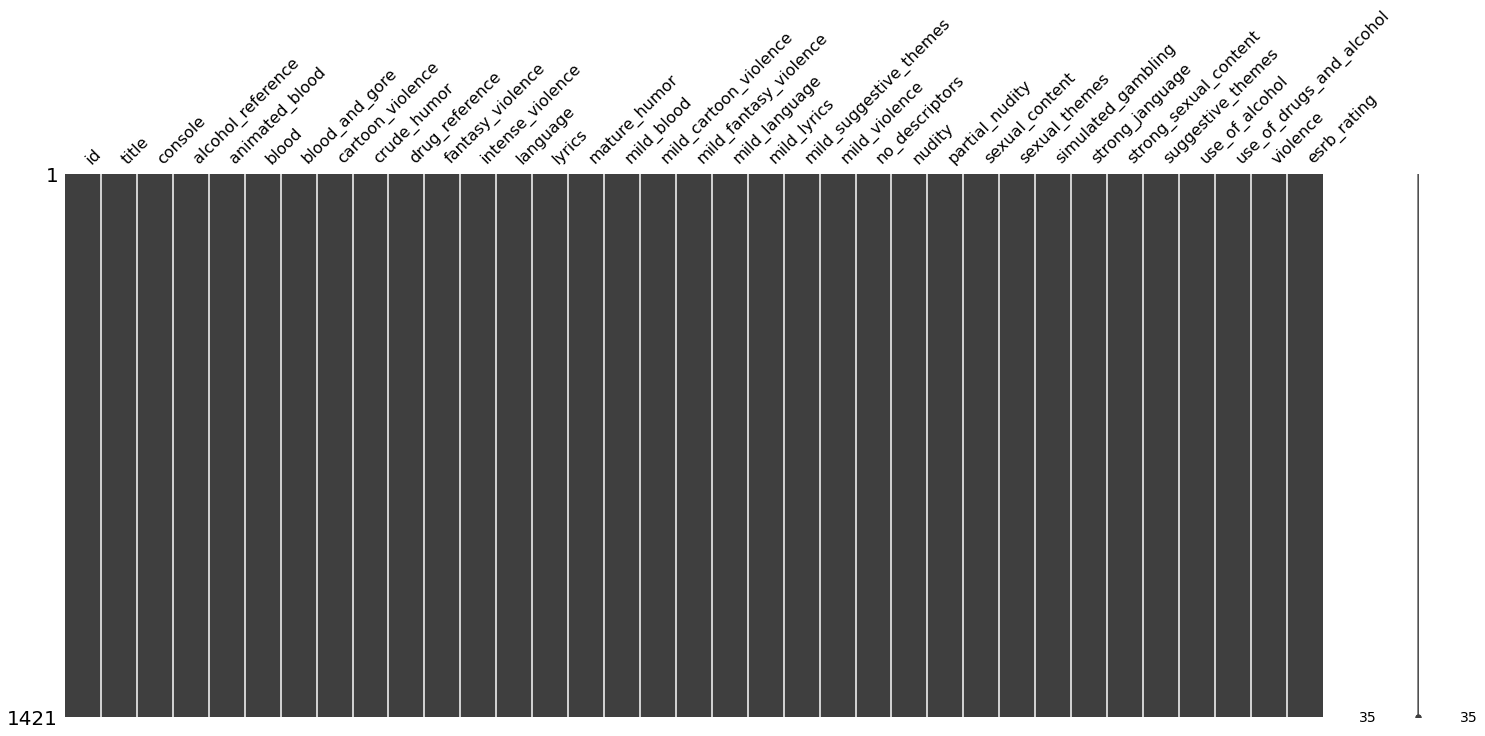

In [5]:
msno.matrix(train_data)

unique_names = pd.unique(train_data['title'])

print(len(unique_names))
print(pd.unique(train_data['esrb_rating']))

no missing data, now trying to break the games by their ratings and seeing what attributes give them their ratings

In [6]:
data_categories = ['alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence',
                  'intense_violence', 'language', 'lyrics', 'mature_humor', 'mild_blood', 'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_lyrics', 
                   'mild_language', 'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity', 'partial_nudity', 'sexual_content', 'sexual_themes',
                  'simulated_gambling', 'strong_janguage', 'strong_sexual_content', 'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence']

train_data.drop(['title'], axis = 1, inplace = True)


for category in data_categories:
    print(category)
    print(pd.unique(train_data[category]))

M_df = train_data[train_data['esrb_rating'] == 'M']
E_df = train_data[train_data['esrb_rating'] == 'E']
ET_df = train_data[train_data['esrb_rating'] == 'ET']
T_df = train_data[train_data['esrb_rating'] == 'T']

alcohol_reference
[0 1]
animated_blood
[0 1]
blood
[0 1]
blood_and_gore
[0 1]
cartoon_violence
[0 1]
crude_humor
[0 1]
drug_reference
[0 1]
fantasy_violence
[0 1]
intense_violence
[0 1]
language
[0 1]
lyrics
[0 1]
mature_humor
[0 1]
mild_blood
[0 1]
mild_cartoon_violence
[0 1]
mild_fantasy_violence
[0 1]
mild_lyrics
[0 1]
mild_language
[1 0]
mild_suggestive_themes
[0 1]
mild_violence
[0 1]
no_descriptors
[0 1]
nudity
[0 1]
partial_nudity
[0 1]
sexual_content
[0 1]
sexual_themes
[0 1]
simulated_gambling
[0 1]
strong_janguage
[0 1]
strong_sexual_content
[0 1]
suggestive_themes
[0 1]
use_of_alcohol
[0 1]
use_of_drugs_and_alcohol
[0 1]
violence
[0 1]


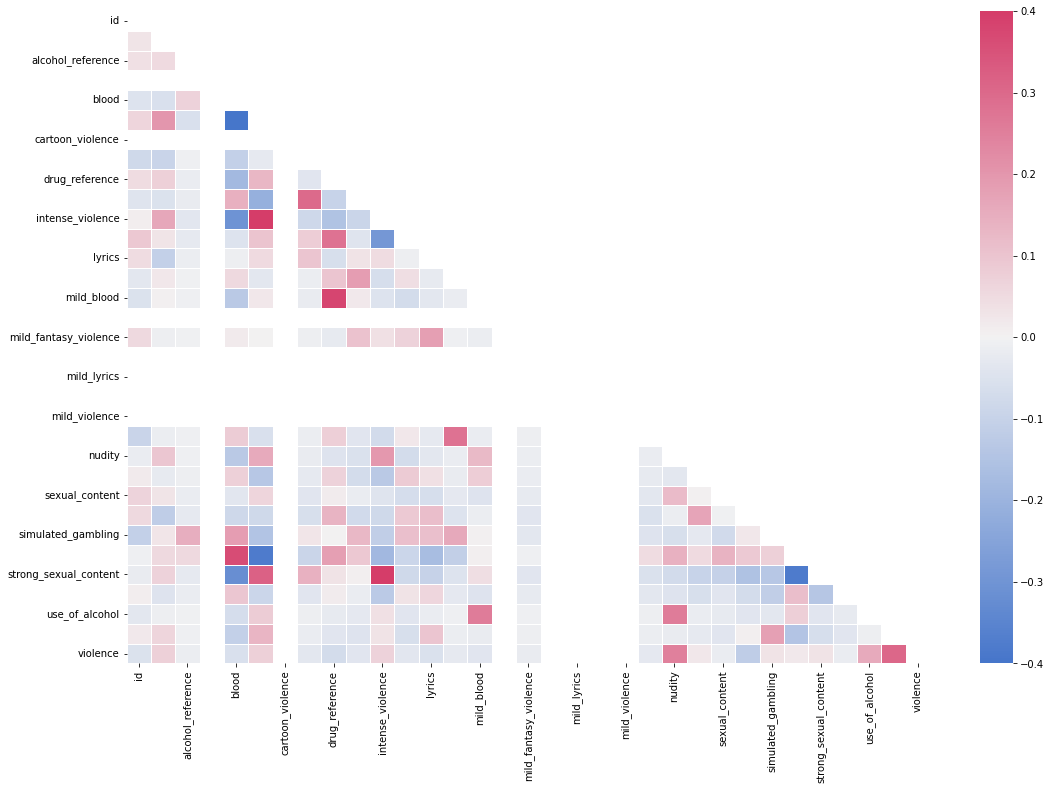

In [7]:
cmap = sns.diverging_palette(h_neg=255, h_pos=0, as_cmap=True)

corr = M_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(M_df.corr(), vmin = -.4, vmax = .4,center = 0, cmap=cmap, linewidths=1,annot=False, mask = mask)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*3, Size[1]*3, forward=True)

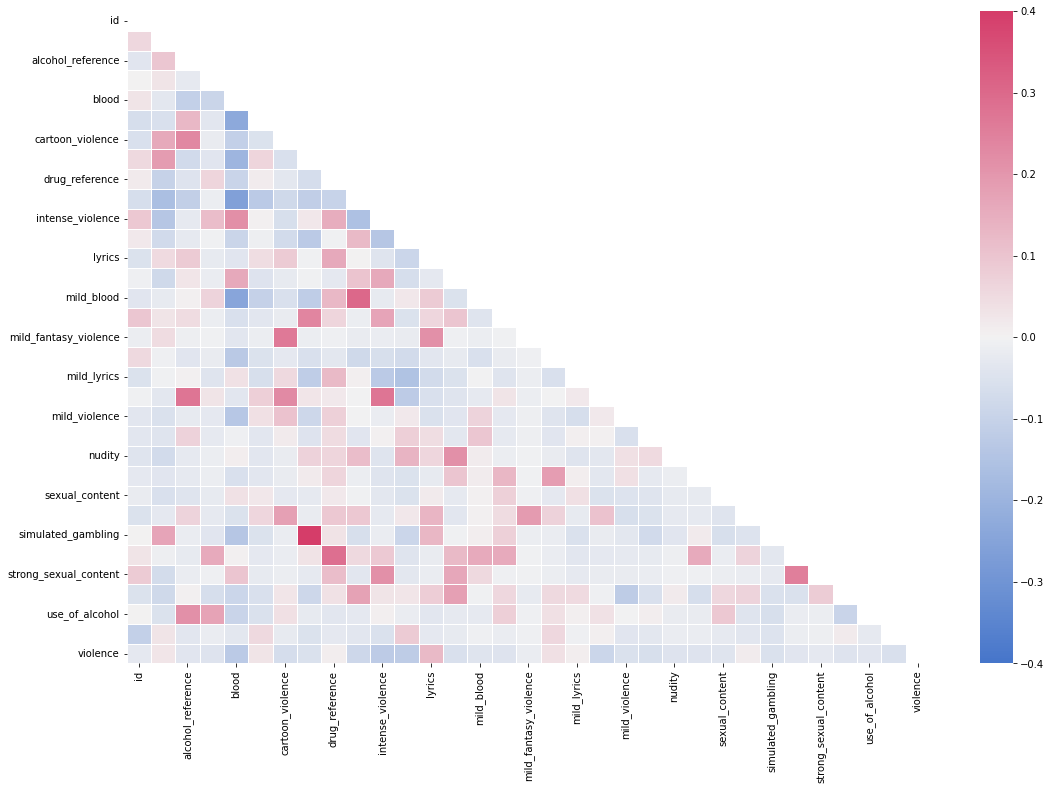

In [8]:
corr = T_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(T_df.corr(), vmin = -.4, vmax = .4,center = 0, cmap=cmap, linewidths=1,annot=False, mask = mask)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*3, Size[1]*3, forward=True)

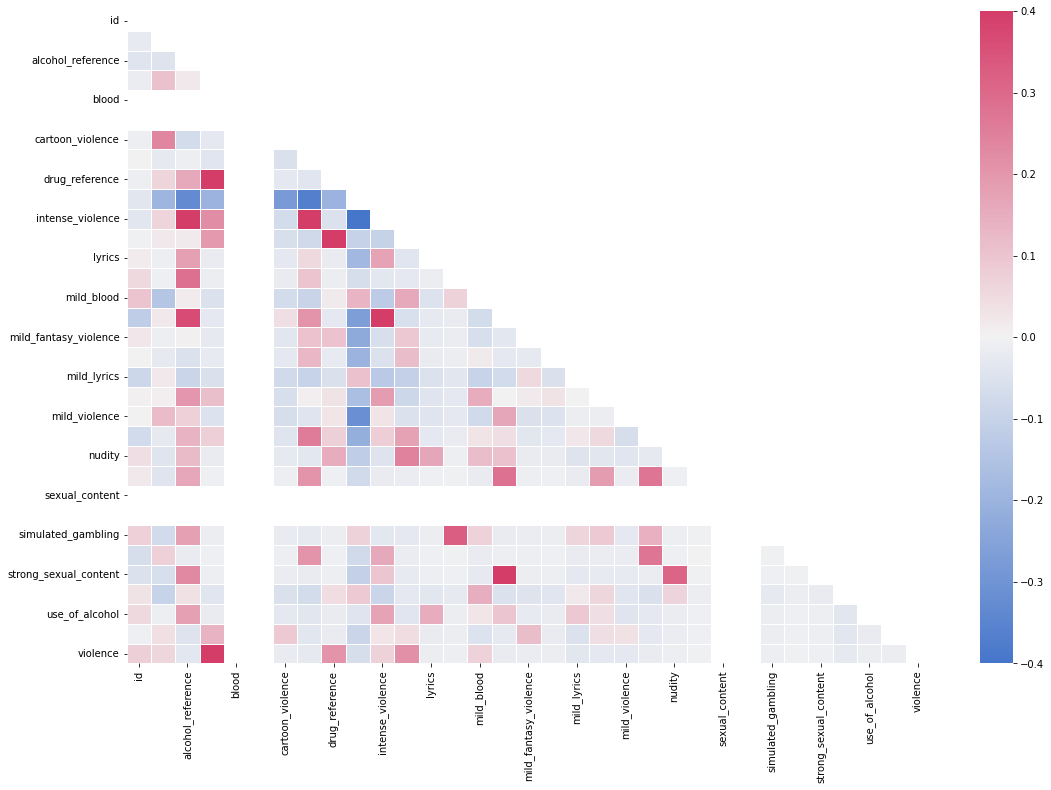

In [9]:
corr = ET_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(ET_df.corr(), vmin = -.4, vmax = .4,center = 0, cmap=cmap, linewidths=1,annot=False, mask = mask)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*3, Size[1]*3, forward=True)

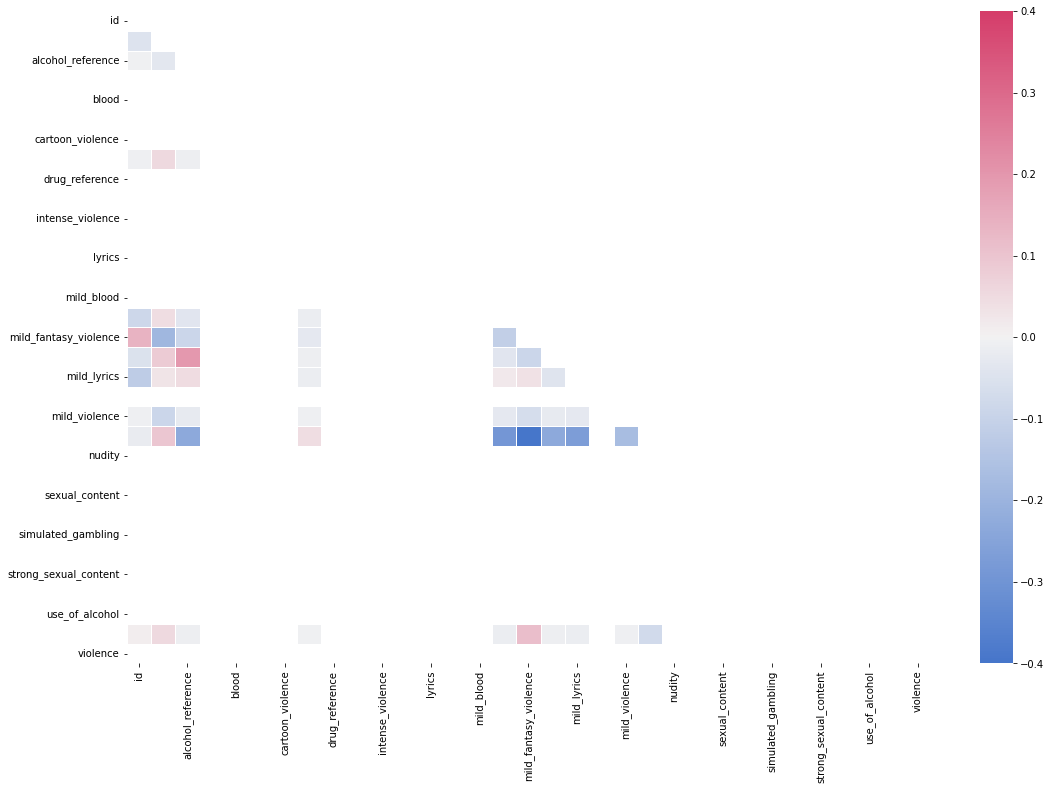

In [10]:
corr = E_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(E_df.corr(), vmin = -.4, vmax = .4,center = 0, cmap=cmap, linewidths=1,annot=False, mask = mask)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*3, Size[1]*3, forward=True)

> # Building the Models

In [11]:
le = LabelEncoder()

train_data['esrb_rating'] = le.fit_transform(train_data['esrb_rating'])


X = train_data.drop('esrb_rating', axis = 1)
test = test_data
y = train_data['esrb_rating']

# Nearest Neighbors Model

In [12]:
knn_params = {'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'n_neighbors' : [1, 3, 5, 7]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid = knn_params, cv =10)
knn.fit(X, y)
predictKnn = knn.predict(test)

knn_acc = knn.score(X, y)

print("KNeighbors Classifier accuracy:", knn_acc)

KNeighbors Classifier accuracy: 0.47149894440534834


# Random Forest Model

In [13]:
forest_params = {'n_estimators' : [50, 100, 150], 'max_depth' : [3, 5, 10]}
forest = GridSearchCV(RandomForestClassifier(random_state = 1), param_grid = forest_params, cv = 10)
forest.fit(X, y)
predictions = forest.predict(test)
forest_acc = forest.score(X, y)

print('Random Forest Classifier:', forest_acc)

Random Forest Classifier: 0.8859957776213934


# Decision Tree Model

In [14]:
tree_params = {'criterion': ['gini', 'entropy'], 'ccp_alpha' : [0.0, 0.1, 0.5, 1.0]}
tree = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid = tree_params, cv = 10)
tree.fit(X, y)
tree_predict = tree.predict(test)
tree_acc = tree.score(X,y)

print('Decision Tree Classifier Accuracy:', tree_acc)

Decision Tree Classifier Accuracy: 1.0


# Logistic Regression

In [15]:
ls_params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10]}
logreg = GridSearchCV(LogisticRegression(solver = 'liblinear', random_state = 1), param_grid = ls_params, cv =10)

logreg.fit(X,y)
log_predict = logreg.predict(test)
log_acc = logreg.score(X,y)

print('Logistic Regression Classifier Accuracy:', log_acc)

Logistic Regression Classifier Accuracy: 0.860661505981703


# Support Vector Machine

In [16]:
sup = GridSearchCV(svm.LinearSVC(dual = False,tol = 0.01, random_state = 100), param_grid = ls_params, cv =10)
sup.fit(X,y)
sup_predict = sup.predict(test)
sup_acc = sup.score(X,y)

print('Support Vector Machine Accuracy:', sup_acc)

Support Vector Machine Accuracy: 0.8592540464461647


# XGB Classifier

In [17]:
model_params = {'booster':['gbtree', 'gblinear', 'gbtree', 'dart'], 'objective' :['reg:linear', 'reg:logistic']}
model = GridSearchCV(xgb.XGBClassifier(use_label_encoder = False, verbosity = 0), param_grid = model_params, cv = 10)
model.fit(X,y)
model_predict = model.predict(test)
model_acc = model.score(X,y)

print('XGB Boost Accuracy:', model_acc)

XGB Boost Accuracy: 0.868402533427164


# Building an Ensemble

In [18]:
#estimators = pd.DataFrame({
#     "SVM_model" : sup, 
#     "XGB_model" : model, 
#     "LogReg_model" : logreg,
#})


estimators = []

estimators.append(('SVM_model', sup))
estimators.append(('XGB_model', model))
estimators.append(('LogReg_model', logreg))

#ensemble = GridSearchCV(estimators, param_grid = ls_params, cv =10)
#ensemble.fit(X, y)
#ensemble_predict = ensemble.predict(test)
#ensemble_acc = model.score(X,y)

#print('Ensemble Accuracy:', ensemble_acc)

# Visualizing The Data

In [19]:
supdf = pd.DataFrame(sup.cv_results_)

supdf.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.005725,0.000428,0.001730,0.000047,0.551049,0.536620,0.531690,0.524648,0.534507,0.530986,0.545070,0.534507,0.553521,0.548592,0.539119,0.010969,4.000000
std,0.002124,0.000492,0.000078,0.000017,0.252971,0.231165,0.224991,0.215100,0.227940,0.222750,0.240910,0.227068,0.251978,0.244863,0.233820,0.013562,1.490712
min,0.004173,0.000045,0.001649,0.000022,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,1.000000
25%,0.004187,0.000072,0.001682,0.000034,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,3.250000
50%,0.004310,0.000151,0.001699,0.000046,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,5.000000
75%,0.007383,0.000855,0.001795,0.000057,0.830420,0.788732,0.774648,0.758803,0.771127,0.767606,0.811620,0.790493,0.830986,0.829225,0.796939,0.023603,5.000000
max,0.009330,0.001300,0.001856,0.000079,0.881119,0.838028,0.830986,0.802817,0.838028,0.823944,0.859155,0.823944,0.873239,0.852113,0.837427,0.031360,5.000000


In [20]:
logdf = pd.DataFrame(logreg.cv_results_)

logdf.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.012503,0.000608,0.001907,0.000066,0.728671,0.679577,0.664085,0.656338,0.676056,0.658451,0.673239,0.657746,0.678169,0.681690,0.675402,0.028514,5.50000
std,0.004185,0.000557,0.000122,0.000031,0.215282,0.197469,0.190620,0.206647,0.219882,0.208782,0.219209,0.209150,0.226524,0.231927,0.210865,0.019958,3.02765
min,0.005474,0.000152,0.001708,0.000035,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,1.00000
25%,0.010797,0.000183,0.001880,0.000040,0.622378,0.549296,0.528169,0.454225,0.463028,0.450704,0.454225,0.441901,0.438380,0.429577,0.483893,0.023627,3.25000
50%,0.013356,0.000366,0.001903,0.000061,0.832168,0.774648,0.771127,0.757042,0.792254,0.767606,0.785211,0.785211,0.813380,0.834507,0.790259,0.026697,5.50000
75%,0.015839,0.000889,0.002008,0.000075,0.884615,0.818662,0.788732,0.808099,0.820423,0.802817,0.829225,0.808099,0.843310,0.852113,0.827544,0.031511,7.75000
max,0.017609,0.001706,0.002055,0.000120,0.888112,0.845070,0.809859,0.809859,0.845070,0.830986,0.859155,0.816901,0.873239,0.866197,0.842342,0.070736,10.00000


In [21]:
forestdf = pd.DataFrame(forest.cv_results_)
forestdf.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.219759,0.003661,0.011558,0.000469,0.819736,0.775430,0.759781,0.766823,0.814554,0.769953,0.811424,0.773083,0.822379,0.818466,0.793163,0.027833,5.000000
std,0.091786,0.003537,0.003711,0.000420,0.028358,0.020665,0.032927,0.047430,0.030085,0.023881,0.017527,0.015659,0.036385,0.032611,0.026398,0.003301,2.738613
min,0.108908,0.000779,0.006860,0.000113,0.783217,0.746479,0.732394,0.697183,0.774648,0.732394,0.795775,0.753521,0.767606,0.774648,0.764927,0.024154,1.000000
25%,0.120607,0.001545,0.007678,0.000165,0.804196,0.760563,0.732394,0.739437,0.795775,0.753521,0.795775,0.760563,0.802817,0.788732,0.769861,0.024365,3.000000
50%,0.213854,0.001700,0.011433,0.000381,0.811189,0.774648,0.746479,0.760563,0.809859,0.767606,0.802817,0.767606,0.823944,0.816901,0.784640,0.028131,5.000000
75%,0.305273,0.005170,0.015354,0.000441,0.846154,0.788732,0.795775,0.816901,0.852113,0.788732,0.823944,0.788732,0.852113,0.845070,0.823338,0.029235,7.000000
max,0.350366,0.010267,0.016615,0.001250,0.860140,0.809859,0.809859,0.830986,0.852113,0.802817,0.838028,0.795775,0.873239,0.866197,0.830390,0.033519,9.000000


In [22]:
treedf = pd.DataFrame(tree.cv_results_)
treedf.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.008444,0.000131,0.001727,0.000053,0.527098,0.532570,0.487676,0.522887,0.503521,0.517606,0.512324,0.504401,0.531690,0.530810,0.517058,0.020072,3.750000
std,0.001521,0.000037,0.000062,0.000020,0.212304,0.211333,0.156872,0.213328,0.201730,0.197219,0.213129,0.202184,0.215386,0.214989,0.202816,0.021685,1.581139
min,0.006799,0.000080,0.001643,0.000026,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,1.000000
25%,0.007102,0.000102,0.001691,0.000036,0.356643,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.359155,0.358904,0.000753,2.750000
50%,0.008359,0.000133,0.001719,0.000052,0.416084,0.426056,0.401408,0.394366,0.359155,0.404930,0.359155,0.359155,0.408451,0.404930,0.393369,0.012952,4.500000
75%,0.009877,0.000148,0.001754,0.000065,0.702797,0.720070,0.663732,0.707746,0.700704,0.718310,0.728873,0.709507,0.748239,0.757042,0.716932,0.040912,5.000000
max,0.010031,0.000183,0.001826,0.000080,0.832168,0.830986,0.690141,0.823944,0.781690,0.788732,0.809859,0.781690,0.816901,0.809859,0.791677,0.047812,5.000000


In [23]:
knndf = pd.DataFrame(knn.cv_results_)
knndf.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.006400,0.000171,0.010862,0.000468,0.237762,0.220070,0.228873,0.177817,0.211268,0.151408,0.214789,0.160211,0.250000,0.211268,0.206347,0.033348,5.500000
std,0.001534,0.000149,0.004131,0.000483,0.005165,0.026711,0.003678,0.003185,0.007355,0.011033,0.015164,0.016753,0.006370,0.012740,0.001672,0.002021,3.503245
min,0.004325,0.000055,0.007560,0.000068,0.230769,0.176056,0.225352,0.176056,0.204225,0.140845,0.197183,0.133803,0.246479,0.204225,0.204762,0.031269,1.000000
25%,0.004592,0.000067,0.008017,0.000111,0.236014,0.218310,0.225352,0.176056,0.204225,0.146127,0.202465,0.154930,0.246479,0.204225,0.204766,0.031894,3.250000
50%,0.006659,0.000125,0.008322,0.000273,0.237762,0.232394,0.228873,0.176056,0.211268,0.147887,0.214789,0.165493,0.246479,0.204225,0.206173,0.032888,5.500000
75%,0.007957,0.000183,0.015342,0.000592,0.239510,0.234155,0.232394,0.177817,0.218310,0.153169,0.227113,0.170775,0.250000,0.211268,0.207754,0.034341,7.750000
max,0.008161,0.000564,0.017196,0.001531,0.244755,0.239437,0.232394,0.183099,0.218310,0.169014,0.232394,0.176056,0.260563,0.232394,0.208278,0.036349,10.000000


# Building A Submission

In [24]:
predictions = sup.predict(test)
predictions = le.inverse_transform(predictions)

output = pd.DataFrame({'id': test_data.id, 'esrb_rating': predictions})
output.to_csv('submission.csv', index=False)